# Stabilité

In [30]:
using DifferentialEquations
using Plots
using ODEInterfaceDiffEq
using LinearAlgebra

In [31]:
function equation(x::Vector{<:Real},p::Vector{<:Real},t::Real, A::Array{2,2})
# Modele de stabilite
# second member of the IVP
# p : paramter vector
# t : time, variable not use here
# A : matrice 
# A compéter
    xpoint = similar(x)
    xpoint[1] = x[2]
    return xpoint    
end

equation (generic function with 1 method)

# 1er cas A = A1

In [32]:
tf = 2*pi*sqrt(3)
t0 = 0.0
y0 = [0.8, 0.5]
A = [-1 -4 ; 1 -1]
solution = exp.(A*(tf-t0))*y0

2-element Vector{Float64}:
     1.5022826653074033e-5
 42601.83618707313

In [33]:
function cercle(x,y,rayon, nb_points)
# La fonction cercle créé un cercle de rayon rayon avec nb_points points depuis son centre x, y
    theta = LinRange(0,2*pi, nb_points)
    x.+rayon*sin.(theta), y.+rayon*cos.(theta)
end

cercle (generic function with 1 method)

In [34]:
#y0 = cercle(0.8,0.8,0.3, 10)

In [156]:
function stabilite(c0, r::Real,tf::Real, A, pas_cercles)
# La fonction stabilite permet de calculer et afficher les solutions de l'EDO
    
# A : matrice A
# c0 : centre du cercle de départ
# r : rayon du cercle de départ
# tf : temps final
#pas_cercles : pas entre les cercles à afficher
    m=10 # nombre de solutions plots
    p=100 #nombre de solutions pour afficher les cercles
    n = 500 #nombre de temps calculés
    t0 = 0.0 #temps initial
    T = zeros(1,n+1) #vecteur des temps
    T[1] = t0
    y0=cercle(c0[1],c0[2],r, p) #vecteur des points de départ
    y = zeros(2,n+1,m) #vecteur des solutions
    h = (tf-t0)/n #pas
    y_cercles = zeros(2,n+1,p) #vecteur de solutions utiles pour faire les cercles
    compt = 1 #compteur pour savoir combien de solutions ont été affichées depuis le dernier cercle
    
    #calcul des vecteurs initiaux
    for k in 1:m
        y[:,1,k] = [y0[1][10*k], y0[2][10*k]]
    end
    
    #calcul des vecteurs initiaux pour l'affichage des cercles
    for k in 1:p
        y_cercles[:,1,k] = [y0[1][k], y0[2][k]]
    end
    
    #calcul des autres vecteurs
    for i in 1:n
        T[i+1] = T[i] + h
        for j in 1:m
            y[:,i+1, j] = exp(A.*(T[i]-t0))*y[:,1, j]
        end
        
        #Créer un vecteur y_cercle permet de ne pas avoir à calculer 100 solutions
        #pour au final n'en afficher que 10, on ne calcule que les solutions 
        #qui vont être utiles pour l'affichage
        if compt==pas_cercles
            for j in 1:p
                y_cercles[:,i+1, j] = exp(A.*(T[i]-t0))*y_cercles[:,1, j]
            end
            compt=0
        end
        compt+=1
    end

    plot()
    #plot des cercles
    for i in 1:pas_cercles:n 
        plot!(y_cercles[1,i,:], y_cercles[2,i,:], fill = (0, 0.8, colorant"rgb(0,255,0)"))
    end
    
    #plot des solutions
    plot!(y[1,:,:], y[2,:,:], legend=false, title = "Visualisation des flots")
    
end

stabilite (generic function with 3 methods)

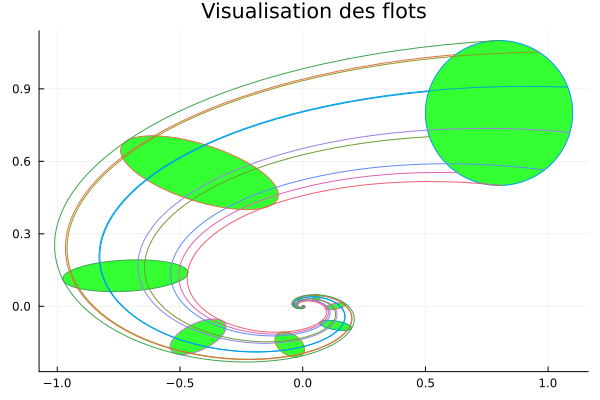

In [157]:
A1 = [-1 -4 ; 1 -1]
A2 = [1 -4 ; 1 -1]
A3 = [1 1 ; 4 -2]
tf1 = 2*pi*sqrt(3)
tf2 = 1
r1 = 0.3
r2 = 0.1
c1 = [0.8, 0.8]
c2 = [0.15, -0.6]


y = stabilite(c1, r1, tf1, A1, 20)

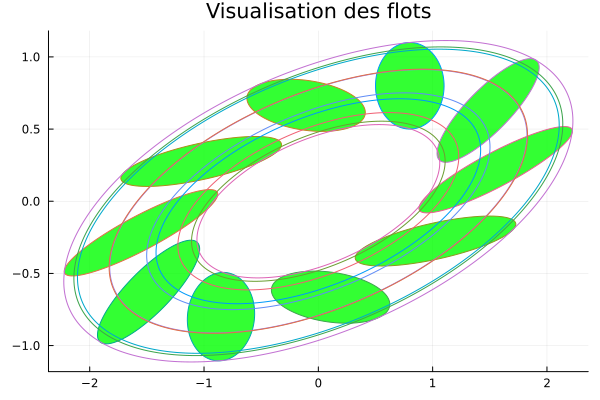

In [158]:
y = stabilite(c1, r1, tf1, A2, 50)

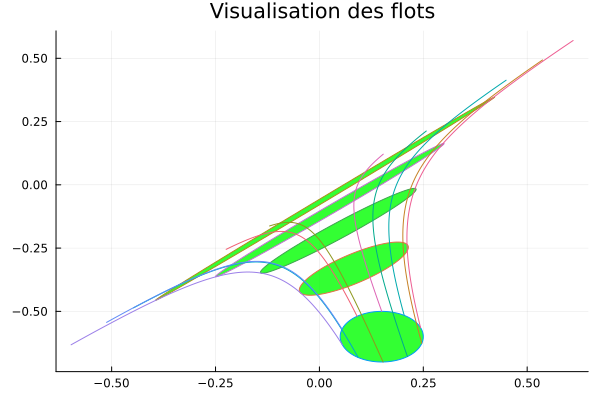

In [159]:
y = stabilite(c2, r2, tf2, A3, 100)